In [20]:
import pandas as pd
import plotly.graph_objects as go # pip install plotly
import numpy as np
from plotly.graph_objs import *
from scipy import stats
import scipy as sp
import seaborn as sns
import plotly.express as px

In [21]:
df = pd.read_csv("ECG.csv")
df2=pd.read_csv("EEG.csv")

# # Number of features : Nf = 30
# Nf=ECG_Features.shape[1]-1
# ECG_Features.head()

In [22]:
X = df.drop(['target','Unnamed: 0','video_name'] , axis=1)
y = df.target

In [23]:
df2

,Unnamed: 0,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,...,psdbeta_13,psdtheta_14,psdalpha_14,psdbeta_14,age,gender,participant,video,video_name,target
0,0,-0.150843,-0.150624,-0.166261,-0.145117,-0.143640,-0.119170,-0.475254,-0.468150,-0.330365,...,-0.419732,-0.195563,-0.195812,-0.204449,22,0,1,1,10,7
1,1,-0.128521,-0.129717,-0.155580,-0.105668,-0.108871,-0.168438,0.302383,0.258150,-0.121029,...,-0.175393,-0.153317,-0.153977,-0.166154,22,0,1,2,2,0
2,2,-0.103209,-0.103515,-0.122637,-0.109388,-0.111235,-0.140875,0.063157,0.057745,0.006707,...,-0.117177,-0.046608,-0.046963,-0.051510,22,0,1,3,14,2
3,3,-0.181723,-0.184244,-0.230825,-0.113030,-0.114522,-0.139100,-0.067104,-0.068218,-0.071644,...,-0.311654,-0.150296,-0.150274,-0.153138,22,0,1,4,15,5
4,4,-0.043894,-0.042331,-0.032673,-0.148676,-0.152181,-0.201394,0.314590,0.301284,0.191730,...,0.125982,0.075506,0.078709,0.108396,22,0,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,409,-0.259796,-0.264659,-0.351959,-0.215325,-0.223008,-0.347720,-0.282586,-0.281040,-0.263415,...,0.063415,-0.052881,-0.052248,-0.049186,25,0,23,14,3,4
410,410,-0.220586,-0.227271,-0.333407,-0.083146,-0.084745,-0.115249,-0.452527,-0.461702,-0.518178,...,-0.490378,0.071075,0.065080,0.012865,25,0,23,15,8,5
411,411,-0.054579,-0.056091,-0.082380,0.014625,0.014887,0.025082,0.225323,0.234515,0.292967,...,-0.042684,-0.025692,-0.028928,-0.061149,25,0,23,16,11,1
412,412,-0.242060,-0.244057,-0.288320,-0.134908,-0.139699,-0.208673,-0.238502,-0.241715,-0.257637,...,-0.480054,-0.119080,-0.118926,-0.121816,25,0,23,17,16,8


In [24]:
X_eeg = df2.drop(['target','Unnamed: 0','video_name'] , axis=1)
y_eeg = df2.target

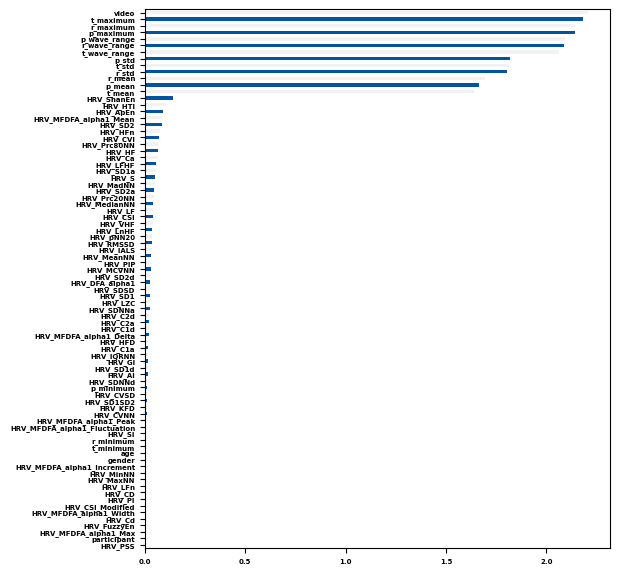

In [25]:
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot as plt
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance , X.columns[0:len(df.columns)-2])
#sortthe features 
feat_importance = feat_importance.sort_values(ascending=True)
# feat_importance.sort_values(ascending=False).plot.bar(figsize=(20, 8))


feat_importance.plot(kind='barh',color=['#00539f','#f2f2f2'],figsize=(6, 7))
# plt.yticks(rotation=45)

font = {'family' : 'open sans',
    
        'size'   : 5}
plt.rc('font', **font)

plt.show()
# pyplot.show()

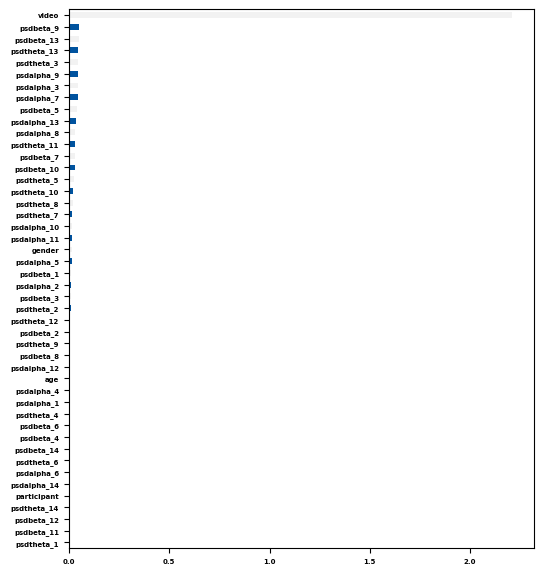

In [26]:
importance2 = mutual_info_classif(X_eeg,y_eeg)
feat_importance2 = pd.Series(importance2 , X_eeg.columns[0:len(df.columns)-2])
#sortthe features 
feat_importance2 = feat_importance2.sort_values(ascending=True)

feat_importance2.plot(kind='barh',color=['#00539f','#f2f2f2'],figsize=(6, 7))
font = {'family' : 'open sans',
        'weight': 'bold',
        'size'   : 5}

plt.rc('font', **font)
plt.show()

In [27]:
selected_features = []
for i in feat_importance.index:
    if feat_importance[i] > 0.1:
        # print(i,feat_importance[i])
        selected_features.append(i)


In [28]:
selected_features2 = []
for i in feat_importance2.index:
    if feat_importance2[i] > 0.04:
        # print(i,feat_importance[i])
        selected_features2.append(i)

# selected_features

# create a data frame of the selected features
df_selected_features2 = df2[selected_features2]
df_selected_features2['target'] = df2['target']

C:\Users\User\AppData\Local\Temp\ipykernel_11092\1021662268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features2['target'] = df2['target']


In [29]:
df_selected_features

,HRV_HTI,HRV_ShanEn,t_mean,p_mean,r_mean,r_std,t_std,p_std,t_wave_range,r_wave_range,p_wave_range,p_maximum,r_maximum,t_maximum,video,video_name,target
0,0.714609,0.911529,0.300548,0.297957,0.299000,0.302032,0.301568,0.302031,0.301179,0.300583,0.300593,0.303361,0.303868,0.304967,1,10,7
1,0.989481,0.900129,0.469265,0.467389,0.468511,0.450570,0.451041,0.450559,0.457957,0.458872,0.458902,0.462588,0.463157,0.463792,2,2,0
2,0.732810,0.892552,0.178162,0.176460,0.177194,0.175853,0.175870,0.175866,0.171590,0.171425,0.171435,0.172699,0.173054,0.173535,3,14,2
3,0.728548,0.911419,0.368277,0.368459,0.369621,0.361761,0.358729,0.361792,0.359214,0.362476,0.362371,0.366418,0.367103,0.364580,4,15,5
4,1.121202,1.007655,0.454329,0.452919,0.454089,0.455074,0.455849,0.455058,0.443794,0.443526,0.443627,0.446740,0.447230,0.448406,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.856038,0.965397,0.364261,0.359494,0.360637,0.361052,0.362877,0.361053,0.358061,0.356180,0.356253,0.356227,0.356780,0.359561,14,3,4
410,0.682920,0.858170,0.204951,0.205294,0.206078,0.201412,0.199192,0.201432,0.193974,0.196112,0.196114,0.197340,0.197722,0.196205,15,8,5
411,0.761416,0.956414,0.319663,0.321380,0.322389,0.314195,0.310041,0.314175,0.304928,0.309166,0.309153,0.312048,0.312539,0.309164,16,11,1
412,0.663265,0.931293,0.226150,0.230104,0.227557,0.241273,0.238349,0.238167,0.232618,0.235904,0.233132,0.236258,0.236728,0.234146,17,16,8


In [30]:
df_selected_features2

,psdbeta_5,psdalpha_7,psdalpha_3,psdalpha_9,psdtheta_3,psdtheta_13,psdbeta_13,psdbeta_9,video,target
0,-0.279274,-0.261720,-0.468150,-0.373330,-0.475254,-0.343952,-0.419732,-0.353098,1,7
1,-0.169434,-0.161049,0.258150,0.038875,0.302383,-0.111932,-0.175393,-0.164130,2,0
2,-0.149021,-0.132559,0.057745,0.033106,0.063157,-0.128325,-0.117177,-0.027737,3,2
3,-0.230109,-0.194850,-0.068218,-0.191371,-0.067104,-0.275669,-0.311654,-0.210938,4,5
4,-0.054181,-0.017967,0.301284,0.208960,0.314590,0.002496,0.125982,0.203095,5,1
...,...,...,...,...,...,...,...,...,...,...
409,-0.314611,0.072221,-0.281040,-0.368012,-0.282586,0.175457,0.063415,-0.428960,14,4
410,-0.305926,-0.363734,-0.461702,-0.375395,-0.452527,-0.397149,-0.490378,-0.441018,15,5
411,-0.084264,-0.293675,0.234515,-0.196020,0.225323,-0.018424,-0.042684,-0.237420,16,1
412,-0.278179,-0.260885,-0.241715,-0.356731,-0.238502,-0.405573,-0.480054,-0.417094,17,8


Text(0, 0.5, 'Amount')

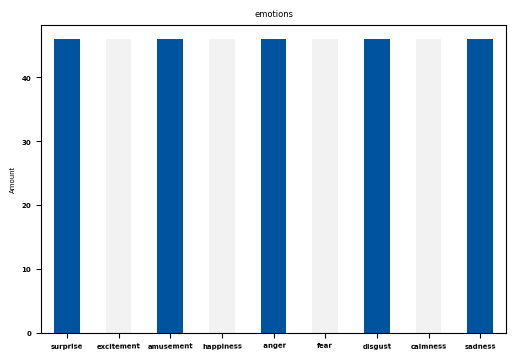

In [37]:
plt.figure(figsize=(6,4))
fig = df.target.value_counts().plot(kind = 'bar', color=['#00539f','#f2f2f2'])
fig.set_xticklabels(labels=['surprise', 'excitement', 'amusement', 'happiness',' anger', 'fear','disgust','calmness', 'sadness'], rotation=0.9);
plt.title("emotions")
plt.ylabel("Amount")

In [32]:
# df_selected_features_new=df_selected_features.drop(['t_wave_range','p_wave_range','p_maximum','t_maximum','r_maximum'] , axis=1)

In [33]:
corr_matrix = df_selected_features_new.corr()
plt.figure(figsize = (6,6))
sns_plot=sns.heatmap(corr_matrix,annot=True, cmap='Blues')
plt.show()

NameError: name 'df_selected_features_new' is not defined

In [ ]:
corr_matrix = df_selected_features2.corr()
plt.figure(figsize = (8,6))
sns_plot=sns.heatmap(corr_matrix,annot=True, cmap='Blues')
plt.show()